#Project - Topic Modeling

Topic Modeling of COVID-19 Research Titles
Problem Statement:
Identifying recurring themes in COVID-19 research can be overwhelming due to the large volume of studies. In this assignment, you will use BERTopic to analyze research paper titles and uncover key topics in the field.

#Steps / Dataset Overview:

Use the provided dataset containing research titles, abstracts, and URLs.
Focus only on the titles column for topic modeling.

#Objective:

Apply BERTopic to discover and analyze topics in the research titles.
Tasks:


# Analysis of Procedure to be taken:
Extract and list the topics with their top keywords.

Visualize topic distributions.

Identify the most common topic and summarize its significance.

Assign a topic and topic name to every title in dataset.

#Deliverables:

A Python script implementing BERTopic.

A brief summary (150–200 words) discussing key findings and visualizations.

# Import the Necessary Libraries

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer, util
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

# Uploading the file

In [ ]:
df=pd.read_csv('/content/covid_abstracts.csv')

In [ ]:
df.head()

title  \
0  Real-World Experience with COVID-19  Including...   
1  Successful outcome of pre-engraftment COVID-19...   
2  The impact of COVID-19 on oncology professiona...   
3  ICU admission and mortality classifiers for CO...   
4  Clinical evaluation of nasopharyngeal  midturb...   

                                            abstract  \
0  This article summarizes the experiences of COV...   
1  Coronavirus disease 2019  COVID-19   caused by...   
2  BACKGROUND  COVID-19 has had a significant imp...   
3  The coronavirus disease 2019  COVID-19  which ...   
4  In the setting of supply chain shortages of na...   

                                        url  
0  https://pubmed.ncbi.nlm.nih.gov/35008137  
1  https://pubmed.ncbi.nlm.nih.gov/35008104  
2  https://pubmed.ncbi.nlm.nih.gov/35007996  
3  https://pubmed.ncbi.nlm.nih.gov/35007991  
4  https://pubmed.ncbi.nlm.nih.gov/35007959

In [ ]:
df=df.dropna()
print(df.shape)

(10000, 3)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     10000 non-null  object
 1   abstract  10000 non-null  object
 2   url       10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [ ]:
# update the dtype to string and int
df['title']=df['title'].astype('string')
df['abstract']= df['abstract'].astype('string')
df['url']=df['url'].astype('string')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     10000 non-null  string
 1   abstract  10000 non-null  string
 2   url       10000 non-null  string
dtypes: string(3)
memory usage: 234.5 KB


title  \
0  Real-World Experience with COVID-19  Including...   
1  Successful outcome of pre-engraftment COVID-19...   
2  The impact of COVID-19 on oncology professiona...   
3  ICU admission and mortality classifiers for CO...   
4  Clinical evaluation of nasopharyngeal  midturb...   

                                            abstract  \
0  This article summarizes the experiences of COV...   
1  Coronavirus disease 2019  COVID-19   caused by...   
2  BACKGROUND  COVID-19 has had a significant imp...   
3  The coronavirus disease 2019  COVID-19  which ...   
4  In the setting of supply chain shortages of na...   

                                        url  
0  https://pubmed.ncbi.nlm.nih.gov/35008137  
1  https://pubmed.ncbi.nlm.nih.gov/35008104  
2  https://pubmed.ncbi.nlm.nih.gov/35007996  
3  https://pubmed.ncbi.nlm.nih.gov/35007991  
4  https://pubmed.ncbi.nlm.nih.gov/35007959

In [ ]:
#remove duplicates if any
df.drop_duplicates()
df

title  \
0     Real-World Experience with COVID-19  Including...   
1     Successful outcome of pre-engraftment COVID-19...   
2     The impact of COVID-19 on oncology professiona...   
3     ICU admission and mortality classifiers for CO...   
4     Clinical evaluation of nasopharyngeal  midturb...   
...                                                 ...   
9995  Rooming-in  Breastfeeding and Neonatal Follow-...   
9996  Acute Retinal Necrosis from Reactivation of Va...   
9997  Acute Abducens Nerve Palsy Following the Secon...   
9998  Planning and Implementing the Protocol for Psy...   
9999  Prolonged corrected QT interval in hospitalize...   

                                               abstract  \
0     This article summarizes the experiences of COV...   
1     Coronavirus disease 2019  COVID-19   caused by...   
2     BACKGROUND  COVID-19 has had a significant imp...   
3     The coronavirus disease 2019  COVID-19  which ...   
4     In the setting of supply chain shortages of na...   
...                                                 ...   
9995  INTRODUCTION  Due to growing evidence suggesti...   
9996  PURPOSE  To report a case of acute retinal nec...   
9997  The authors report the case of an otherwise he...   
9998  The present study aims to plan the protocol fo...   
9999  OBJECTIVE  To evaluate the association of a pr...   

                                           url  
0     https://pubmed.ncbi.nlm.nih.gov/35008137  
1     https://pubmed.ncbi.nlm.nih.gov/35008104  
2     https://pubmed.ncbi.nlm.nih.gov/35007996  
3     https://pubmed.ncbi.nlm.nih.gov/35007991  
4     https://pubmed.ncbi.nlm.nih.gov/35007959  
...                                        ...  
9995  https://pubmed.ncbi.nlm.nih.gov/34851815  
9996  https://pubmed.ncbi.nlm.nih.gov/34851795  
9997  https://pubmed.ncbi.nlm.nih.gov/34851785  
9998  https://pubmed.ncbi.nlm.nih.gov/34851781  
9999  https://pubmed.ncbi.nlm.nih.gov/34851769  

[10000 rows x 3 columns]

In [ ]:
#create an array of descriptions
docs = df.title.values

In [ ]:
docs[0:5]

<StringArray>
['Real-World Experience with COVID-19  Including Direct COVID-19 Antigen Testing and Monoclonal-Antibody Bamlanivimab in a Rural Critical Access Hospital in South Dakota',
                                                    'Successful outcome of pre-engraftment COVID-19 in an HCT patient  impact of targeted therapies and cellular immunity',
                                         'The impact of COVID-19 on oncology professionals-one year on  lessons learned from the ESMO Resilience Task Force survey series',
                          'ICU admission and mortality classifiers for COVID-19 patients based on subgroups of dynamically associated profiles across multiple timepoints',
                                                       'Clinical evaluation of nasopharyngeal  midturbinate nasal and oropharyngeal swabs for the detection of SARS-CoV-2']
Length: 5, dtype: string

In [ ]:
# Import the SentenceTransformer model to generate dense vector embeddings for documents
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # A pre-trained transformer model optimized for semantic similarity
#https://huggingface.co/sentence-transformers


# Instantiate the BERTopic model
# embedding_model: Specifies the embedding model to use for document vectorization.
# language: Defines the language of the documents (in this case, English).
# calculate_probabilities: Indicates whether to calculate the probabilities of a document belonging to topics (True).
# verbose: Enables detailed logging of the model's processing steps for better visibility.
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="english",
    calculate_probabilities=True,
    verbose=True
)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Generate topics and their corresponding probabilities for the documents
# topics: A list of integers, where each integer corresponds to the topic assigned to a specific document.
# probs: A 2D array (list of lists), where each inner list contains the probabilities of the corresponding document
#        belonging to each topic.
topics, probs = topic_model.fit_transform(docs)  # docs is a list of input documents to be analyzed

2025-01-25 13:48:38,579 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2025-01-25 13:51:50,108 - BERTopic - Embedding - Completed ✓
2025-01-25 13:51:50,112 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-25 13:52:44,837 - BERTopic - Dimensionality - Completed ✓
2025-01-25 13:52:44,839 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-25 13:53:03,317 - BERTopic - Cluster - Completed ✓
2025-01-25 13:53:03,331 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-25 13:53:03,921 - BERTopic - Representation - Completed ✓


In [ ]:
len(probs)

10000

In [ ]:
topic_model.get_topic(0)

[('respiratory', 0.03128061948584481),
 ('oxygen', 0.028084771991306094),
 ('pulmonary', 0.026715484145219404),
 ('ventilation', 0.025273027642382866),
 ('lung', 0.025217200922349168),
 ('mechanical', 0.020813081587844715),
 ('pressure', 0.017417884212977717),
 ('distress', 0.016630297737764786),
 ('acute', 0.01541525735655042),
 ('ventilated', 0.015057868709838506)]

In [ ]:
topic_model.get_topic(13)

[('stock', 0.041531091126943684),
 ('financial', 0.03346065808733722),
 ('market', 0.028886076062751596),
 ('economic', 0.02712063682579423),
 ('circular', 0.025341996613001298),
 ('sustainable', 0.02403753271552791),
 ('oil', 0.023644223714755126),
 ('markets', 0.023644223714755126),
 ('economy', 0.023181425793471565),
 ('price', 0.02304001126209791)]

In [ ]:
topic_model.get_topic_info() #show topic information

Topic  Count                                               Name  \
0       -1   3523                                 -1_the_of_covid_19   
1        0    157         0_respiratory_oxygen_pulmonary_ventilation   
2        1    153      1_telemedicine_telehealth_satisfaction_during   
3        2    142                    2_child_children_parents_mental   
4        3    134                           3_variants_sars_cov_cell   
..     ...    ...                                                ...   
175    174     11         174_influenza_infodemiology_united_kingdom   
176    175     11                175_complement_c5a_lungs_vasculitis   
177    176     11                 176_fatigue_post_chronic_cognitive   
178    177     10  177_virtual_oncology_multidisciplinary_delivering   
179    178     10  178_resistance_antifungal_antimicrobial_antibi...   

                                        Representation  \
0    [the, of, covid, 19, in, and, to, pandemic, co...   
1    [respiratory, oxygen, pulmonary, ventilation, ...   
2    [telemedicine, telehealth, satisfaction, durin...   
3    [child, children, parents, mental, families, a...   
4    [variants, sars, cov, cell, vaccine, vaccines,...   
..                                                 ...   
175  [influenza, infodemiology, united, kingdom, is...   
176  [complement, c5a, lungs, vasculitis, markers, ...   
177  [fatigue, post, chronic, cognitive, impairment...   
178  [virtual, oncology, multidisciplinary, deliver...   
179  [resistance, antifungal, antimicrobial, antibi...   

                                   Representative_Docs  
0    [Emerging Adults  Mental Health During the COV...  
1    [High-flow nasal oxygen therapy decrease the r...  
2    [Development of a Telemedicine Screening Progr...  
3    [Child behavior problems during COVID-19  Asso...  
4    [The variants of SARS-CoV-2 and the challenges...  
..                                                 ...  
175  [A comparison of coronavirus disease 2019 and ...  
176  [Persistence of High Levels of Serum Complemen...  
177  [Chronic fatigue syndrome against the backgrou...  
178  [Benefits and drawbacks of videoconferencing f...  
179  [Resource and infrastructure challenges on the...  

[180 rows x 5 columns]

# Visualizing Topics

In [ ]:
topic_model.visualize_topics()

# Visualizing Word Frequency

In [ ]:
topic_model.visualize_barchart(top_n_topics=20)

# Word Cloud for Abstract column

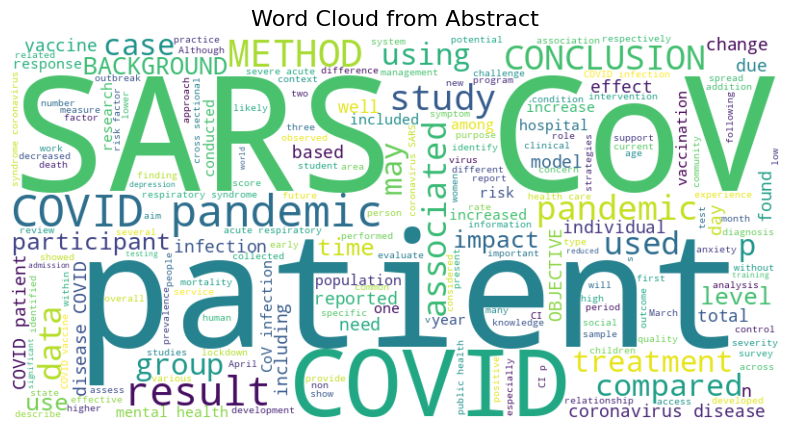

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in the column into a single string
text = ' '.join(df['abstract'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Abstract", fontsize=16)
plt.show()

# Word Cloud for Title



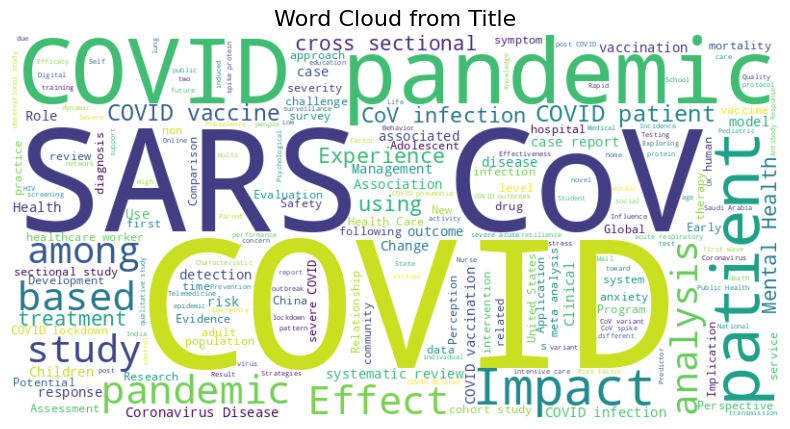

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in the column into a single string
text = ' '.join(df['title'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Title", fontsize=16)
plt.show()

# Word Frequencies for Abstract - Method 1

---



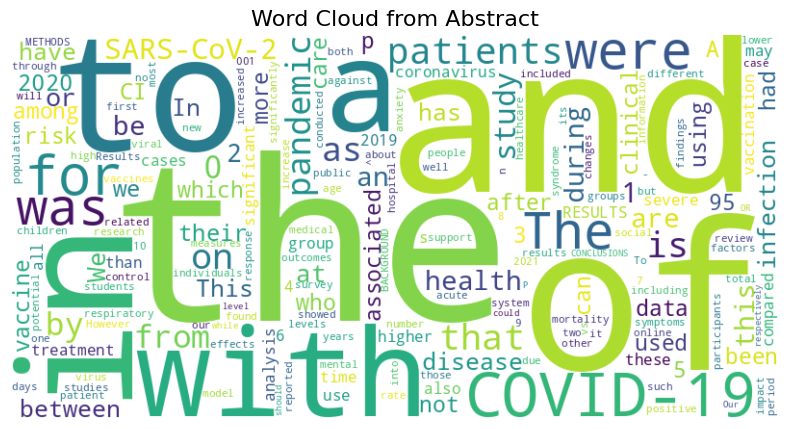

In [ ]:
# Split text into words and count the frequency of each word
word_freq = df['abstract'].str.split(expand=True).stack().value_counts()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Abstract", fontsize=16)
plt.show()

# Word Frequency for Title - Method 2

---



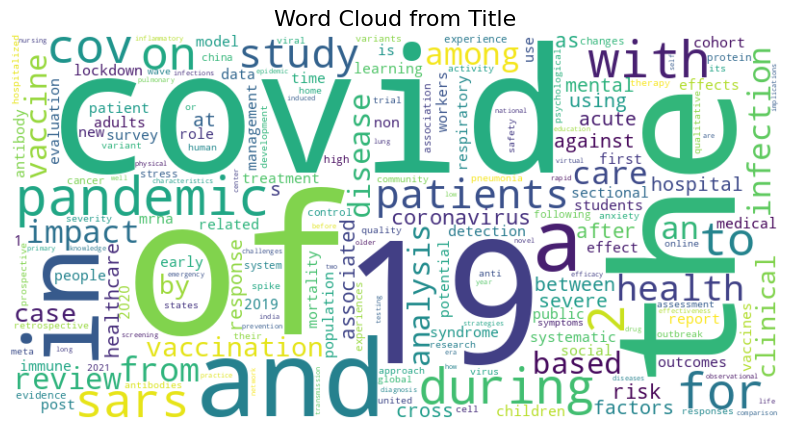

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re

# Example DataFrame with a text column

df = pd.DataFrame(df)

# Step 1: Combine all text into one string
text = ' '.join(df['title'])

# Step 2: Clean the text (optional: remove punctuation, convert to lowercase)
text = re.sub(r'\W', ' ', text)  # Remove non-word characters (punctuation)
text = text.lower()  # Convert to lowercase to count words consistently

# Step 3: Split the text into words
words = text.split()

# Step 4: Count the frequency of each word using Counter
word_freq = Counter(words)

# Step 5: Generate the word cloud from word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Step 6: Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Title", fontsize=16)
plt.show()

# Visualizing Heatmap

In [ ]:
topic_model.visualize_heatmap( width=1000, height=1000)

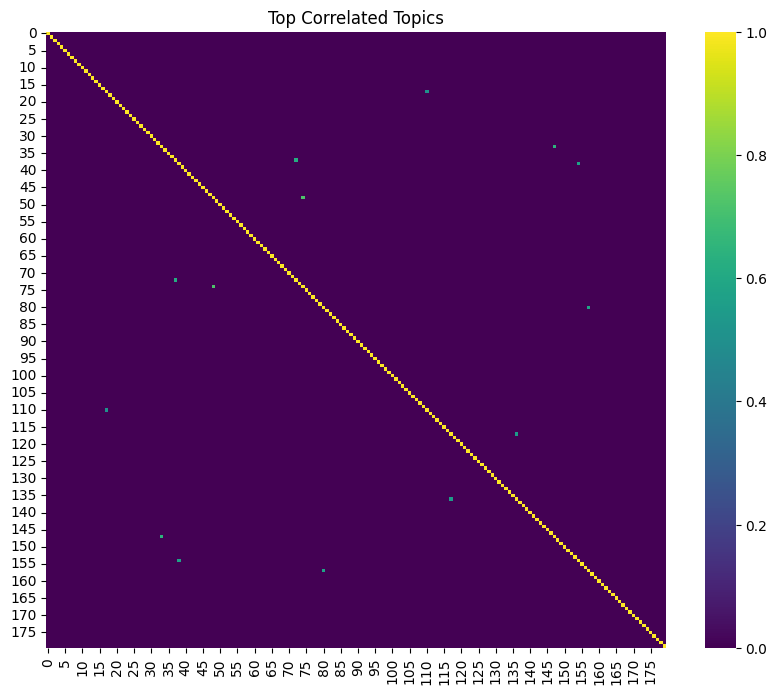

In [ ]:
import numpy as np

# Extract c-TF-IDF representation
c_tf_idf = topic_model.c_tf_idf_

# Compute the cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
correlation_matrix = cosine_similarity(c_tf_idf)

# Apply a threshold (e.g., focus on correlations > 0.5)
threshold = 0.5
filtered_matrix = np.where(correlation_matrix > threshold, correlation_matrix, 0)

# You can visualize this filtered matrix using your preferred heatmap library
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_matrix, cmap="viridis")
plt.title("Top Correlated Topics")
plt.show()

# Getting the Label Topics

In [ ]:
topic_model.generate_topic_labels()

['-1_the_of_covid',
 '0_respiratory_oxygen_pulmonary',
 '1_telemedicine_telehealth_satisfaction',
 '2_child_children_parents',
 '3_variants_sars_cov',
 '4_mental_health_work',
 '5_sars_cov_transmission',
 '6_antiviral_treatment_potential',
 '7_antibodies_igg_neutralizing',
 '8_protease_inhibitors_main',
 '9_spike_protein_ace2',
 '10_modeling_mathematical_model',
 '11_myocardial_cardiovascular_infarction',
 '12_media_twitter_social',
 '13_stock_financial_market',
 '14_masks_mask_face',
 '15_images_deep_ray',
 '16_nurses_nursing_nurse',
 '17_cancer_breast_oncology',
 '18_adherence_ethical_community',
 '19_vaccination_vaccine_effectiveness',
 '20_research_policy_lessons',
 '21_graphene_detection_biosensor',
 '22_neurological_brain_report',
 '23_dental_dentistry_oral',
 '24_students_university_depression',
 '25_respiratory_syndrome_coronavirus',
 '26_clinical_prognosis_patients',
 '27_air_pollution_pm2',
 '28_pregnant_pregnancy_women',
 '29_vaccine_willingness_acceptance',
 '30_machine_int

# Finding Topics related to a String

In [ ]:
topic_model.find_topics("COVID") # topics related to COVID

([20, 117, -1, 165, 18],
 [0.6816027, 0.6644381, 0.6605797, 0.6411659, 0.6199458])

# Assigning Topic Number and Name to every document in the DataFrame

In [ ]:
df.head()

title  \
0  Real-World Experience with COVID-19  Including...   
1  Successful outcome of pre-engraftment COVID-19...   
2  The impact of COVID-19 on oncology professiona...   
3  ICU admission and mortality classifiers for CO...   
4  Clinical evaluation of nasopharyngeal  midturb...   

                                            abstract  \
0  This article summarizes the experiences of COV...   
1  Coronavirus disease 2019  COVID-19   caused by...   
2  BACKGROUND  COVID-19 has had a significant imp...   
3  The coronavirus disease 2019  COVID-19  which ...   
4  In the setting of supply chain shortages of na...   

                                        url  
0  https://pubmed.ncbi.nlm.nih.gov/35008137  
1  https://pubmed.ncbi.nlm.nih.gov/35008104  
2  https://pubmed.ncbi.nlm.nih.gov/35007996  
3  https://pubmed.ncbi.nlm.nih.gov/35007991  
4  https://pubmed.ncbi.nlm.nih.gov/35007959

In [ ]:
# Step 1: Assign topic numbers to the DataFrame
df["topic"] = topics  # The `topics` output from BERTopic

df.head(10)

title  \
0  Real-World Experience with COVID-19  Including...   
1  Successful outcome of pre-engraftment COVID-19...   
2  The impact of COVID-19 on oncology professiona...   
3  ICU admission and mortality classifiers for CO...   
4  Clinical evaluation of nasopharyngeal  midturb...   
5  Safer in care  A pandemic-tested model of inte...   
6  The effect of Covid-19 in digital media use of...   
7  Scanning the RBD-ACE2 molecular interactions i...   
8  Implications of SARS-CoV-2 infection on the cl...   
9  Merbromin is a mixed-type inhibitor of 3-chyom...   

                                            abstract  \
0  This article summarizes the experiences of COV...   
1  Coronavirus disease 2019  COVID-19   caused by...   
2  BACKGROUND  COVID-19 has had a significant imp...   
3  The coronavirus disease 2019  COVID-19  which ...   
4  In the setting of supply chain shortages of na...   
5  BACKGROUND  Rural  poor  persons with HIV  PWH...   
6  BACKGROUND  Covid-19 pandemic has boosted digi...   
7  The emergence of new SARS-CoV-2 variants poses...   
8  BACKGROUND  The current coronavirus pandemic  ...   
9  3-chyomotrypsin like protease  3CLpro  has bee...   

                                        url  topic  
0  https://pubmed.ncbi.nlm.nih.gov/35008137     69  
1  https://pubmed.ncbi.nlm.nih.gov/35008104     -1  
2  https://pubmed.ncbi.nlm.nih.gov/35007996    114  
3  https://pubmed.ncbi.nlm.nih.gov/35007991     82  
4  https://pubmed.ncbi.nlm.nih.gov/35007959     91  
5  https://pubmed.ncbi.nlm.nih.gov/35007957    116  
6  https://pubmed.ncbi.nlm.nih.gov/35007925     -1  
7  https://pubmed.ncbi.nlm.nih.gov/35007846     -1  
8  https://pubmed.ncbi.nlm.nih.gov/35007842     -1  
9  https://pubmed.ncbi.nlm.nih.gov/35007835      8

In [ ]:
topic_labels=(topic_model.generate_topic_labels())
topic_labels

['-1_the_of_covid',
 '0_respiratory_oxygen_pulmonary',
 '1_telemedicine_telehealth_satisfaction',
 '2_child_children_parents',
 '3_variants_sars_cov',
 '4_mental_health_work',
 '5_sars_cov_transmission',
 '6_antiviral_treatment_potential',
 '7_antibodies_igg_neutralizing',
 '8_protease_inhibitors_main',
 '9_spike_protein_ace2',
 '10_modeling_mathematical_model',
 '11_myocardial_cardiovascular_infarction',
 '12_media_twitter_social',
 '13_stock_financial_market',
 '14_masks_mask_face',
 '15_images_deep_ray',
 '16_nurses_nursing_nurse',
 '17_cancer_breast_oncology',
 '18_adherence_ethical_community',
 '19_vaccination_vaccine_effectiveness',
 '20_research_policy_lessons',
 '21_graphene_detection_biosensor',
 '22_neurological_brain_report',
 '23_dental_dentistry_oral',
 '24_students_university_depression',
 '25_respiratory_syndrome_coronavirus',
 '26_clinical_prognosis_patients',
 '27_air_pollution_pm2',
 '28_pregnant_pregnancy_women',
 '29_vaccine_willingness_acceptance',
 '30_machine_int

In [ ]:
topic_mapping = {i: label for i, label in enumerate(topic_labels, start=-1)}
topic_mapping

{-1: '-1_the_of_covid',
 0: '0_respiratory_oxygen_pulmonary',
 1: '1_telemedicine_telehealth_satisfaction',
 2: '2_child_children_parents',
 3: '3_variants_sars_cov',
 4: '4_mental_health_work',
 5: '5_sars_cov_transmission',
 6: '6_antiviral_treatment_potential',
 7: '7_antibodies_igg_neutralizing',
 8: '8_protease_inhibitors_main',
 9: '9_spike_protein_ace2',
 10: '10_modeling_mathematical_model',
 11: '11_myocardial_cardiovascular_infarction',
 12: '12_media_twitter_social',
 13: '13_stock_financial_market',
 14: '14_masks_mask_face',
 15: '15_images_deep_ray',
 16: '16_nurses_nursing_nurse',
 17: '17_cancer_breast_oncology',
 18: '18_adherence_ethical_community',
 19: '19_vaccination_vaccine_effectiveness',
 20: '20_research_policy_lessons',
 21: '21_graphene_detection_biosensor',
 22: '22_neurological_brain_report',
 23: '23_dental_dentistry_oral',
 24: '24_students_university_depression',
 25: '25_respiratory_syndrome_coronavirus',
 26: '26_clinical_prognosis_patients',
 27: '27_

In [ ]:
import numpy as np
# Use Outliers (-1) temporarily to replace NaN to handle missing labels
df["topic_name"] = df["topic"].replace(-1, np.nan)


# Map topic_labels directly to the topic column
df["topic_name"] = df["topic_name"].map(pd.Series(topic_mapping))

df.tail(10)

title  \
9990  Factors associated with early receipt of COVID...   
9991  Aerosol tracer testing in Boeing 767 and 777 a...   
9992  Cumulative burden of non-communicable diseases...   
9993  Preoperative and Postoperative Opioid Prescrip...   
9994  Hypersensitivity Reactions to Vaccines  Curren...   
9995  Rooming-in  Breastfeeding and Neonatal Follow-...   
9996  Acute Retinal Necrosis from Reactivation of Va...   
9997  Acute Abducens Nerve Palsy Following the Secon...   
9998  Planning and Implementing the Protocol for Psy...   
9999  Prolonged corrected QT interval in hospitalize...   

                                               abstract  \
9990  BACKGROUND  We aimed to determine factors inde...   
9991  The COVID-19 pandemic has reintroduced questio...   
9992  There continue to be conflicting data regardin...   
9993  The United States is facing an opioid epidemic...   
9994  The first reports of hypersensitivity reaction...   
9995  INTRODUCTION  Due to growing evidence suggesti...   
9996  PURPOSE  To report a case of acute retinal nec...   
9997  The authors report the case of an otherwise he...   
9998  The present study aims to plan the protocol fo...   
9999  OBJECTIVE  To evaluate the association of a pr...   

                                           url  topic  \
9990  https://pubmed.ncbi.nlm.nih.gov/34851970     19   
9991  https://pubmed.ncbi.nlm.nih.gov/34851965     -1   
9992  https://pubmed.ncbi.nlm.nih.gov/34851963    116   
9993  https://pubmed.ncbi.nlm.nih.gov/34851880     -1   
9994  https://pubmed.ncbi.nlm.nih.gov/34851819      3   
9995  https://pubmed.ncbi.nlm.nih.gov/34851815     -1   
9996  https://pubmed.ncbi.nlm.nih.gov/34851795     -1   
9997  https://pubmed.ncbi.nlm.nih.gov/34851785     -1   
9998  https://pubmed.ncbi.nlm.nih.gov/34851781     -1   
9999  https://pubmed.ncbi.nlm.nih.gov/34851769     40   

                                topic_name  
9990  19_vaccination_vaccine_effectiveness  
9991                                   NaN  
9992         116_hiv_adherence_afghanistan  
9993                                   NaN  
9994                   3_variants_sars_cov  
9995                                   NaN  
9996                                   NaN  
9997                                   NaN  
9998                                   NaN  
9999           40_2019_coronavirus_disease

In [ ]:
# Fill NaN values with "Outlier" for -1 topics
df["topic_name"].fillna("Outlier", inplace=True)
df.tail(10)

title  \
9990  Factors associated with early receipt of COVID...   
9991  Aerosol tracer testing in Boeing 767 and 777 a...   
9992  Cumulative burden of non-communicable diseases...   
9993  Preoperative and Postoperative Opioid Prescrip...   
9994  Hypersensitivity Reactions to Vaccines  Curren...   
9995  Rooming-in  Breastfeeding and Neonatal Follow-...   
9996  Acute Retinal Necrosis from Reactivation of Va...   
9997  Acute Abducens Nerve Palsy Following the Secon...   
9998  Planning and Implementing the Protocol for Psy...   
9999  Prolonged corrected QT interval in hospitalize...   

                                               abstract  \
9990  BACKGROUND  We aimed to determine factors inde...   
9991  The COVID-19 pandemic has reintroduced questio...   
9992  There continue to be conflicting data regardin...   
9993  The United States is facing an opioid epidemic...   
9994  The first reports of hypersensitivity reaction...   
9995  INTRODUCTION  Due to growing evidence suggesti...   
9996  PURPOSE  To report a case of acute retinal nec...   
9997  The authors report the case of an otherwise he...   
9998  The present study aims to plan the protocol fo...   
9999  OBJECTIVE  To evaluate the association of a pr...   

                                           url  topic  \
9990  https://pubmed.ncbi.nlm.nih.gov/34851970     19   
9991  https://pubmed.ncbi.nlm.nih.gov/34851965     -1   
9992  https://pubmed.ncbi.nlm.nih.gov/34851963    116   
9993  https://pubmed.ncbi.nlm.nih.gov/34851880     -1   
9994  https://pubmed.ncbi.nlm.nih.gov/34851819      3   
9995  https://pubmed.ncbi.nlm.nih.gov/34851815     -1   
9996  https://pubmed.ncbi.nlm.nih.gov/34851795     -1   
9997  https://pubmed.ncbi.nlm.nih.gov/34851785     -1   
9998  https://pubmed.ncbi.nlm.nih.gov/34851781     -1   
9999  https://pubmed.ncbi.nlm.nih.gov/34851769     40   

                                topic_name  
9990  19_vaccination_vaccine_effectiveness  
9991                               Outlier  
9992         116_hiv_adherence_afghanistan  
9993                               Outlier  
9994                   3_variants_sars_cov  
9995                               Outlier  
9996                               Outlier  
9997                               Outlier  
9998                               Outlier  
9999           40_2019_coronavirus_disease

In [ ]:
df_ch = df[df['topic'] == 10]
df_ch

title  \
127   Stochastic modeling  analysis  and simulation ...   
135   Application of probabilistic models for extrem...   
168   Modeling COVID-19 Transmission Dynamics With S...   
244   Genetic Drift Versus Climate Region Spreading ...   
546   Meteorological factors  effects on COVID-19 sh...   
...                                                 ...   
9680  Homogenous mixing and network approximations i...   
9721  Sampling bias minimization in disease frequenc...   
9726  Transmission Dynamics of Large Coronavirus Dis...   
9747  Application of principal component analysis on...   
9884  On the global time evolution of the Covid-19 p...   

                                               abstract  \
127   In this paper  a stochastic epidemiological mo...   
135   Worldwide  COVID-19 coronavirus disease is spr...   
168   Many regions observed recurrent outbreaks of C...   
244   Background  The current propagation models of ...   
546   The meteorological conditions may affect COVID...   
...                                                 ...   
9680  A discrete-time deterministic epidemic model i...   
9721  An accurate estimate of the number of infected...   
9726  Severe acute respiratory syndrome coronavirus ...   
9747  The COVID-19 is one of the worst pandemics in ...   
9884  In this article it is presented a multi-logist...   

                                           url  topic  \
127   https://pubmed.ncbi.nlm.nih.gov/35005324     10   
135   https://pubmed.ncbi.nlm.nih.gov/35005154     10   
168   https://pubmed.ncbi.nlm.nih.gov/35004580     10   
244   https://pubmed.ncbi.nlm.nih.gov/35003200     10   
546   https://pubmed.ncbi.nlm.nih.gov/34999027     10   
...                                        ...    ...   
9680  https://pubmed.ncbi.nlm.nih.gov/34856872     10   
9721  https://pubmed.ncbi.nlm.nih.gov/34856201     10   
9726  https://pubmed.ncbi.nlm.nih.gov/34856112     10   
9747  https://pubmed.ncbi.nlm.nih.gov/34855909     10   
9884  https://pubmed.ncbi.nlm.nih.gov/34853486     10   

                          topic_name  
127   10_modeling_mathematical_model  
135   10_modeling_mathematical_model  
168   10_modeling_mathematical_model  
244   10_modeling_mathematical_model  
546   10_modeling_mathematical_model  
...                              ...  
9680  10_modeling_mathematical_model  
9721  10_modeling_mathematical_model  
9726  10_modeling_mathematical_model  
9747  10_modeling_mathematical_model  
9884  10_modeling_mathematical_model  

[93 rows x 5 columns]

In [ ]:
df_ch2 = df[df['topic'] == -1]
df_ch2

title  \
1     Successful outcome of pre-engraftment COVID-19...   
6     The effect of Covid-19 in digital media use of...   
7     Scanning the RBD-ACE2 molecular interactions i...   
8     Implications of SARS-CoV-2 infection on the cl...   
11    The psychological impact of therapeutic change...   
...                                                 ...   
9993  Preoperative and Postoperative Opioid Prescrip...   
9995  Rooming-in  Breastfeeding and Neonatal Follow-...   
9996  Acute Retinal Necrosis from Reactivation of Va...   
9997  Acute Abducens Nerve Palsy Following the Secon...   
9998  Planning and Implementing the Protocol for Psy...   

                                               abstract  \
1     Coronavirus disease 2019  COVID-19   caused by...   
6     BACKGROUND  Covid-19 pandemic has boosted digi...   
7     The emergence of new SARS-CoV-2 variants poses...   
8     BACKGROUND  The current coronavirus pandemic  ...   
11    OBJECTIVE  The exceptional health situation re...   
...                                                 ...   
9993  The United States is facing an opioid epidemic...   
9995  INTRODUCTION  Due to growing evidence suggesti...   
9996  PURPOSE  To report a case of acute retinal nec...   
9997  The authors report the case of an otherwise he...   
9998  The present study aims to plan the protocol fo...   

                                           url  topic topic_name  
1     https://pubmed.ncbi.nlm.nih.gov/35008104     -1    Outlier  
6     https://pubmed.ncbi.nlm.nih.gov/35007925     -1    Outlier  
7     https://pubmed.ncbi.nlm.nih.gov/35007846     -1    Outlier  
8     https://pubmed.ncbi.nlm.nih.gov/35007842     -1    Outlier  
11    https://pubmed.ncbi.nlm.nih.gov/35007776     -1    Outlier  
...                                        ...    ...        ...  
9993  https://pubmed.ncbi.nlm.nih.gov/34851880     -1    Outlier  
9995  https://pubmed.ncbi.nlm.nih.gov/34851815     -1    Outlier  
9996  https://pubmed.ncbi.nlm.nih.gov/34851795     -1    Outlier  
9997  https://pubmed.ncbi.nlm.nih.gov/34851785     -1    Outlier  
9998  https://pubmed.ncbi.nlm.nih.gov/34851781     -1    Outlier  

[3523 rows x 5 columns]

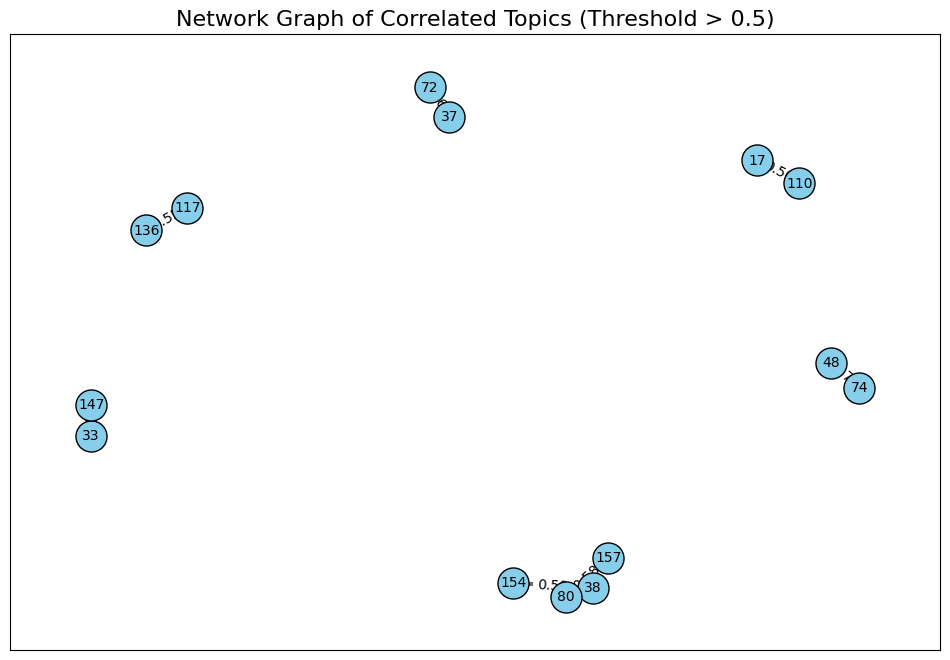

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Extract c-TF-IDF representation
c_tf_idf = topic_model.c_tf_idf_

# Compute the cosine similarity matrix
correlation_matrix = cosine_similarity(c_tf_idf)

# Apply a threshold (e.g., focus on correlations > 0.5)
threshold = 0.5
edges = np.argwhere(correlation_matrix > threshold)

# Create a network graph
G = nx.Graph()

# Add nodes (topics) and edges (correlations above threshold)
for i, j in edges:
    if i != j:  # Avoid self-loops
        G.add_edge(i, j, weight=correlation_matrix[i, j])

# Define positions for nodes using a spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the network graph
plt.figure(figsize=(12, 8))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Draw edges with varying thickness based on correlation strength
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, edgelist=edges.keys(),
                       width=[v * 5 for v in edges.values()], alpha=0.6)

# Add edge labels to display correlation values
nx.draw_networkx_edge_labels(G, pos, edge_labels={e: f"{w:.2f}" for e, w in edges.items()})

# Add title
plt.title("Network Graph of Correlated Topics (Threshold > 0.5)", fontsize=16)

# Show plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity

# Extract c-TF-IDF representation
c_tf_idf = topic_model.c_tf_idf_

# Compute the cosine similarity matrix
correlation_matrix = cosine_similarity(c_tf_idf)

# Apply a threshold to filter correlations > 0.5
threshold = 0.5
filtered_matrix = np.where(correlation_matrix > threshold, correlation_matrix, 0)

# Create a DataFrame for easy manipulation
topics = [f"Topic {i}" for i in range(len(filtered_matrix))]
df_corr = pd.DataFrame(filtered_matrix, index=topics, columns=topics)

# Flatten the matrix to identify topic pairs
df_flattened = df_corr.stack().reset_index()
df_flattened.columns = ['Source', 'Target', 'Weight']

# Filter for significant correlations (exclude self-loops)
df_flattened = df_flattened[(df_flattened['Weight'] > threshold) & (df_flattened['Source'] != df_flattened['Target'])]

# Prepare data for Plotly visualization
nodes = list(df_corr.index)  # List of topics
sources = [nodes.index(src) for src in df_flattened['Source']]
targets = [nodes.index(tgt) for tgt in df_flattened['Target']]
weights = df_flattened['Weight']

# Create Plotly Sankey-like Diagram (works as a chord-like diagram)
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,  # Topics as nodes
        color="skyblue"
    ),
    link=dict(
        source=sources,  # Indices of source topics
        target=targets,  # Indices of target topics
        value=weights,   # Correlation strength
        color="rgba(0,100,255,0.5)"
    )
)])

# Add a title and show the figure
fig.update_layout(
    title_text="Chord Diagram of Correlated Topics (Threshold > 0.5)",
    font_size=10,
    height=700,
    width=1000
)

fig.show()

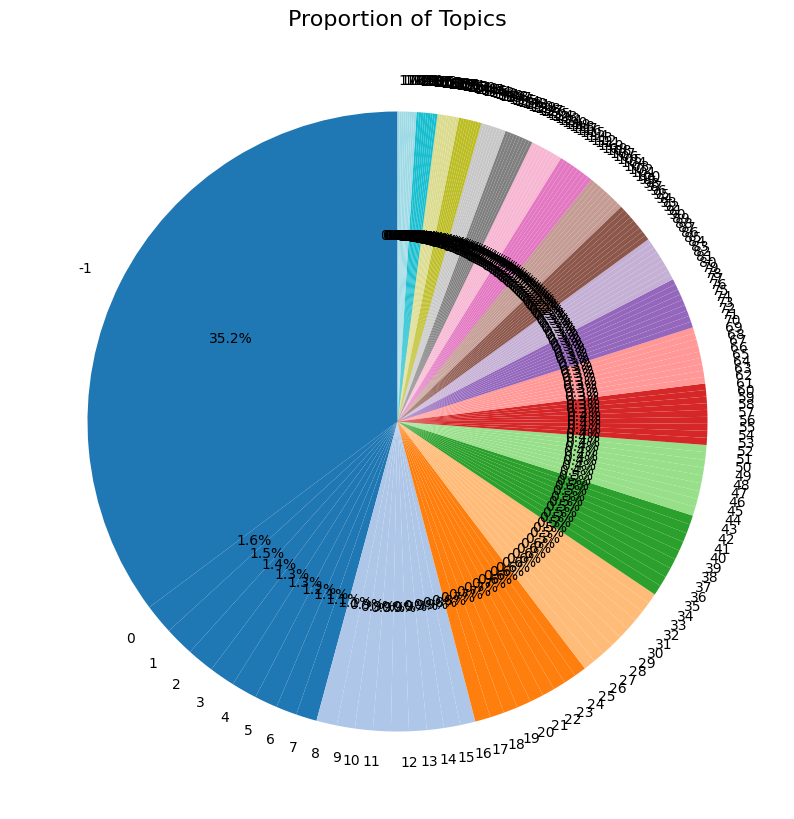

In [ ]:
# Calculate proportions of topics
topic_proportions = df['topic'].value_counts(normalize=True)

# Plot as a pie chart
plt.figure(figsize=(10, 15))
topic_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="tab20")
plt.title("Proportion of Topics", fontsize=16)
plt.ylabel("")  # Hide y-axis label
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate proportions and counts of topics
topic_summary = df['topic'].value_counts(normalize=False).reset_index()
topic_summary.columns = ['Topic', 'Count']
topic_summary['Proportion (%)'] = (topic_summary['Count'] / topic_summary['Count'].sum()) * 100

# Display the table in the console
print(topic_summary)

     Topic  Count  Proportion (%)
0       -1   3523           35.23
1        0    157            1.57
2        1    153            1.53
3        2    142            1.42
4        3    134            1.34
..     ...    ...             ...
175    174     11            0.11
176    175     11            0.11
177    176     11            0.11
178    177     10            0.10
179    178     10            0.10

[180 rows x 3 columns]


# Top 10 Most Used Words in the Abstract

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Creating Bag of Words representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['abstract'])

# Step 3: Get feature names (words) and their frequencies
feature_names = vectorizer.get_feature_names_out()
word_frequencies = bow_matrix.toarray().sum(axis=0)

# Create a DataFrame to display frequencies
frequency_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 most frequent words
print("Top 10 Most Frequent Words:")
print(frequency_df.head(10))

Top 10 Most Frequent Words:
    Word  Frequency
0    the     118824
1    and      85465
2     of      85291
3     in      52878
4     to      51661
5  covid      29423
6     19      29160
7   with      26749
8    for      21270
9   were      18872


# Top 10 Most Used Words in the Title

In [ ]:
# Creating Bag of Words representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['title'])

# Step 3: Get feature names (words) and their frequencies
feature_names = vectorizer.get_feature_names_out()
word_frequencies = bow_matrix.toarray().sum(axis=0)

# Create a DataFrame to display frequencies
frequency_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 most frequent words
print("Top 10 Most Frequent Words:")
print(frequency_df.head(10))

Top 10 Most Frequent Words:
       Word  Frequency
0        of       8232
1     covid       6617
2        19       6506
3       the       6367
4       and       6223
5        in       5822
6  pandemic       2096
7      with       1928
8       for       1829
9    during       1805


# Removing English Stopwords to see if Top 10 Frequent Words Result will improve

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


# Define a function to remove stop words
def remove_stopwords(text, stop_words=set(ENGLISH_STOP_WORDS)):
    # Tokenize and remove stop words
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply the function to the titles column
df['title_cleaned'] = df['title'].apply(remove_stopwords)
df['abstract_cleaned'] = df['abstract'].apply(remove_stopwords)

# Display the cleaned dataset
df.head()

title  \
0  Real-World Experience with COVID-19  Including...   
1  Successful outcome of pre-engraftment COVID-19...   
2  The impact of COVID-19 on oncology professiona...   
3  ICU admission and mortality classifiers for CO...   
4  Clinical evaluation of nasopharyngeal  midturb...   

                                            abstract  \
0  This article summarizes the experiences of COV...   
1  Coronavirus disease 2019  COVID-19   caused by...   
2  BACKGROUND  COVID-19 has had a significant imp...   
3  The coronavirus disease 2019  COVID-19  which ...   
4  In the setting of supply chain shortages of na...   

                                        url  topic  \
0  https://pubmed.ncbi.nlm.nih.gov/35008137     69   
1  https://pubmed.ncbi.nlm.nih.gov/35008104     -1   
2  https://pubmed.ncbi.nlm.nih.gov/35007996    114   
3  https://pubmed.ncbi.nlm.nih.gov/35007991     82   
4  https://pubmed.ncbi.nlm.nih.gov/35007959     91   

                            topic_name  \
0  69_antibody_monoclonal_bamlanivimab   
1                              Outlier   
2    114_resilience_healthcare_lessons   
3         82_intensive_unit_critically   
4                91_saliva_swabs_nasal   

                                       title_cleaned  \
0  Real-World Experience COVID-19 Including Direc...   
1  Successful outcome pre-engraftment COVID-19 HC...   
2  impact COVID-19 oncology professionals-one yea...   
3  ICU admission mortality classifiers COVID-19 p...   
4  Clinical evaluation nasopharyngeal midturbinat...   

                                    abstract_cleaned  
0  article summarizes experiences COVID-19 patien...  
1  Coronavirus disease 2019 COVID-19 caused sever...  
2  BACKGROUND COVID-19 significant impact well-be...  
3  coronavirus disease 2019 COVID-19 caused sever...  
4  setting supply chain shortages nasopharyngeal ...

# Revised Top 10 Most Frequent Words in Title

In [ ]:
# Creating Bag of Words representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['title_cleaned'])

# Step 3: Get feature names (words) and their frequencies
feature_names = vectorizer.get_feature_names_out()
word_frequencies = bow_matrix.toarray().sum(axis=0)

# Create a DataFrame to display frequencies
frequency_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 most frequent words
print("Top 10 Most Frequent Words:")
print(frequency_df.head(10))

Top 10 Most Frequent Words:
       Word  Frequency
0     covid       6617
1        19       6506
2  pandemic       2096
3      sars       1748
4       cov       1721
5  patients       1171
6     study       1160
7    health        880
8    impact        660
9      care        637


# Revised Top 10 Most Frequent Words in Abstract

In [ ]:
# Creating Bag of Words representation
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['abstract_cleaned'])

# Step 3: Get feature names (words) and their frequencies
feature_names = vectorizer.get_feature_names_out()
word_frequencies = bow_matrix.toarray().sum(axis=0)

# Create a DataFrame to display frequencies
frequency_df = pd.DataFrame({'Word': feature_names, 'Frequency': word_frequencies})

# Sort by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 most frequent words
print("Top 10 Most Frequent Words:")
print(frequency_df.head(10))

Top 10 Most Frequent Words:
       Word  Frequency
0     covid      29423
1        19      29160
2  patients      13837
3  pandemic      11528
4      sars       9376
5       cov       9248
6     study       8763
7    health       8315
8   results       6621
9   disease       5827


# Revised Wordcloud for Title after removing English Stopwords

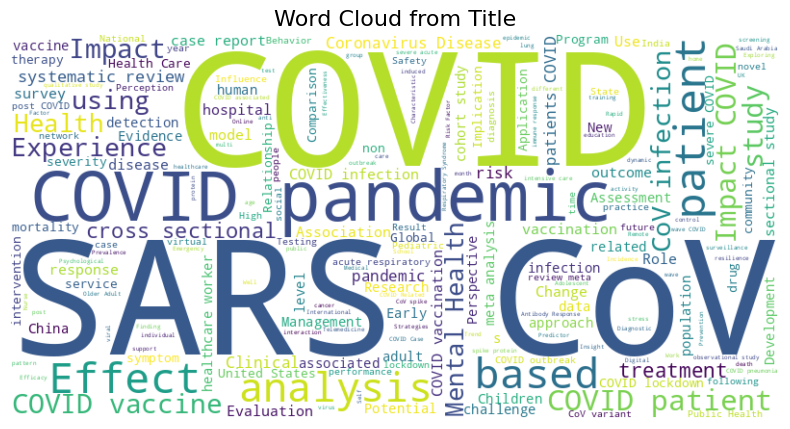

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in the column into a single string
text = ' '.join(df['title_cleaned'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Title", fontsize=16)
plt.show()

# Revised Wordcloud for Abstract after removing Stopwords

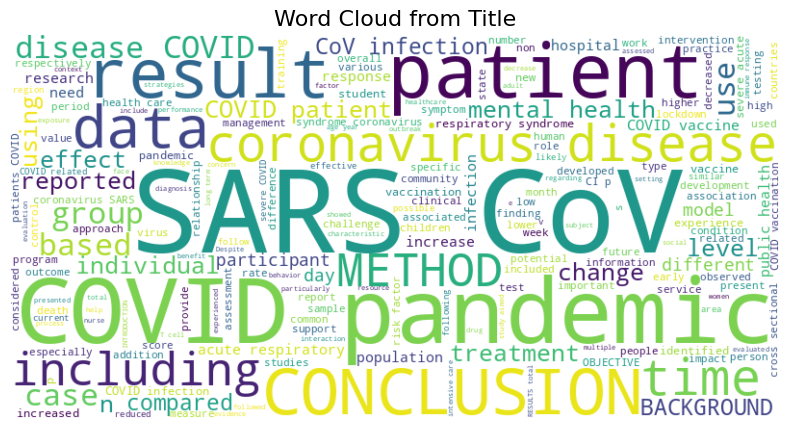

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in the column into a single string
text = ' '.join(df['abstract_cleaned'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud from Title", fontsize=16)
plt.show()

# Display of Title Information and the most relevant words

In [ ]:
from bertopic import BERTopic


# Initialize and fit the BERTopic model
model = BERTopic()
topics_list, probabilities = model.fit_transform(topics)

# Extract topics and related keywords
topic_info = model.get_topic_info()

# Display the topic info (topics and their most relevant words)
print("BERTopic Results:")
print(topic_info)

BERTopic Results:
   Topic  Count               Name  \
0      0    100  0_topic_152_90_93   
1      1     80   1_topic_47_72_70   

                                      Representation  \
0  [topic, 152, 90, 93, 177, 99, 175, 151, 173, 172]   
1        [topic, 47, 72, 70, 63, 62, 73, 74, 75, 76]   

                 Representative_Docs  
0  [Topic 152, Topic 130, Topic 125]  
1        [Topic 0, Topic 9, Topic 4]  


In [ ]:
from bertopic import BERTopic


# Ensure that topics are not empty or null
topics = [topic for topic in topics if isinstance(topic, str) and topic.strip() != '']

# Initialize and fit the BERTopic model
model = BERTopic()
topics_list, probabilities = model.fit_transform(topics)

# Extract topics and related keywords
topic_info = topic_model.get_topic_info()

# Display the topic info (topics and their most relevant words)
print("BERTopic Results:")
print(topic_info)


BERTopic Results:
     Topic  Count                                               Name  \
0       -1   3523                                 -1_the_of_covid_19   
1        0    157         0_respiratory_oxygen_pulmonary_ventilation   
2        1    153      1_telemedicine_telehealth_satisfaction_during   
3        2    142                    2_child_children_parents_mental   
4        3    134                           3_variants_sars_cov_cell   
..     ...    ...                                                ...   
175    174     11         174_influenza_infodemiology_united_kingdom   
176    175     11                175_complement_c5a_lungs_vasculitis   
177    176     11                 176_fatigue_post_chronic_cognitive   
178    177     10  177_virtual_oncology_multidisciplinary_delivering   
179    178     10  178_resistance_antifungal_antimicrobial_antibi...   

                                        Representation  \
0    [the, of, covid, 19, in, and, to, pandemic, co...   
1

# Summary of Findings

#1. The following are the most frequent words used in the the 5 top most common topics

Topic  Count                                               Name  \
0       -1   3523                                 -1_the_of_covid_19   
1        0    157         0_respiratory_oxygen_pulmonary_ventilation   
2        1    153      1_telemedicine_telehealth_satisfaction_during   
3        2    142                    2_child_children_parents_mental   
4        3    134                           3_variants_sars_cov_cell

#2. The top 10 most frequent word used in the titles are:

0     covid       6617
1        19       6506
2  pandemic       2096
3      sars       1748
4       cov       1721
5  patients       1171
6     study       1160
7    health        880
8    impact        660
9      care        637

#3. The top 10 most frequent word used in the abstract are:

0     covid      29423
1        19      29160
2  patients      13837
3  pandemic      11528
4      sars       9376
5       cov       9248
6     study       8763
7    health       8315
8   results       6621
9   disease       5827

# 4. The topic 7 highly related topics are:

- Topic 38 and 74
- Topic 48 and 136
- Topic 117 and 154
- Topic 80 and 157
- Topic 37 and 147
- Topic 33 and 72
- Topic 17 and 110

#5. Topic 0 which is an Outlier had a greatest count of Topic information



